In [29]:
import pandas as pd

df = pd.read_excel(r'sr28abxl\ABBREV.xlsx')
df.head()


,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


## Food description data

In [30]:
des = pd.read_csv(r'sr28asc\FOOD_DES.txt', sep = r'~\^~', engine='python', encoding='latin1', header=None)
# Remove stray ~ characters
des = des.map(lambda x: x.strip('~') if isinstance(x, str) else x)

# Split the last column (index 7) further by '^' to extract the remaining fields
extra_cols = des[7].str.split('^', expand=True)

# Combine the parts together
des = pd.concat([des.iloc[:, :7], extra_cols], axis=1)

des.columns = [
    'NDB_No',        # Food ID number
    'FdGrp_Cd',      # Food group code
    'Long_Desc',     # Long description (readable food name)
    'Shrt_Desc',     # Short description (abbreviated name)
    'ComName',       # Common name (if available)
    'ManufacName',   # Manufacturer’s name
    'Survey',        # “Y” if used in USDA survey data
    'Ref_desc',      # Reference description
    'Refuse',        # Percent refuse
    'SciName',       # Scientific name or taxonomy info
    'Nitrogen_Factor',      # Nitrogen factor
    'Protein_Factor',    # Protein factor
    'Fat_Factor',    # Fat factor
    'CHO_Factor'     # Carbohydrate factor
]
des = des.drop(columns=['Shrt_Desc'], axis=1)
des.head()


,NDB_No,FdGrp_Cd,Long_Desc,ComName,ManufacName,Survey,Ref_desc,Refuse,SciName,Nitrogen_Factor,Protein_Factor,Fat_Factor,CHO_Factor
0,01001,100,"Butter, salted",NaN,NaN,Y,,0,~~,6.38,4.27,8.79,3.87
1,01002,100,"Butter, whipped, with salt",NaN,NaN,Y,,0,~~,6.38,,,
2,01003,100,"Butter oil, anhydrous",NaN,NaN,Y,,0,~~,6.38,4.27,8.79,3.87
3,01004,100,"Cheese, blue",NaN,NaN,Y,,0,~~,6.38,4.27,8.79,3.87
4,01005,100,"Cheese, brick",NaN,NaN,Y,,0,~~,6.38,4.27,8.79,3.87


### Nut data

In [31]:
nut = pd.read_csv(
    r'sr28asc\NUT_DATA.txt',
    sep=r'~\^~',
    engine='python',
    encoding='latin1',
    header=None
)

# Clean stray ~
nut = nut.map(lambda x: x.strip('~').replace('~', '') if isinstance(x, str) else x)

# Split the *second* column (index 1) by '^' to separate nutrient info
split_cols = nut[1].str.split('^', expand=True)

# Combine with the rest of the columns
df_nut_data = pd.concat([nut[[0]], split_cols, nut.iloc[:, 2:]], axis=1)

# Select the last column *explicitly as a Series*
last_col_name = df_nut_data.columns[-1]
last_col_series = df_nut_data.iloc[:, -1] 


last_split = last_col_series.astype(str).str.split('^', expand=True)

# Combine all cleaned parts
df_nut_data = pd.concat([df_nut_data.iloc[:, :-1], last_split], axis=1)


In [32]:
df_nut_data.columns = [f"col_{i}" for i in range(df_nut_data.shape[1])]
df_nut_data.drop(df_nut_data.columns[0], axis=1, inplace=True)


In [33]:
# column names

df_nut_data.columns = [
    'Nutr_No', 'Nutr_Val', 'Num_Data_Pts', 'Std_Error',
    'Src_Cd', 'Deriv_Cd', 'Ref_NDB_No', 'Add_Nutr_Mark', 'Num_Studies',
    'Min', 'Max', 'DF', 'Low_EB', 'Up_EB', 'Stat_cmt', 'AddMod_Date', 'CC'
]

#  Convert numeric columns
num_cols = [
    'Nutr_Val','Num_Data_Pts','Std_Error','Num_Studies',
    'Min','Max','DF','Low_EB','Up_EB'
]
df_nut_data[num_cols] = df_nut_data[num_cols].apply(pd.to_numeric, errors='coerce')

In [34]:
df_nut_data.head()

,Nutr_No,Nutr_Val,Num_Data_Pts,Std_Error,Src_Cd,Deriv_Cd,Ref_NDB_No,Add_Nutr_Mark,Num_Studies,Min,Max,DF,Low_EB,Up_EB,Stat_cmt,AddMod_Date,CC
0,203,0.85,16,0.074,1,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,11/1976,
1,204,81.11,580,0.065,1,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,11/1976,
2,205,0.06,0,NaN,4,NC,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,11/1976,
3,207,2.11,35,0.054,1,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,11/1976,
4,208,717.00,0,NaN,4,NC,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,,08/2010,


## nutri data

In [35]:
# load file 
nutri_data = pd.read_csv(r'sr28asc\NUTR_DEF.txt', sep = r'~\^~', engine='python', encoding='latin1', header=None)

# strip the stray ~ symbols
nutri_data = nutri_data.map(lambda x: x.strip('~').replace('~', '') if isinstance(x, str) else x)

# combine the first and secomd columns
nutri_data[0] = nutri_data[0].astype(str).str.strip() + '' + nutri_data[1].astype(str).str.strip()

# Drop the second column since it’s now merged
nutri_data = nutri_data.drop(columns=[1])

# rename columns
nutri_data.columns = ['Nutrient_Code_Unit', 'Tagname', 'Nutrient_Name', 'Num_Dec', 'SR_Order']

nutri_data.head()

,Nutrient_Code_Unit,Tagname,Nutrient_Name,Num_Dec,SR_Order
0,203g,PROCNT,Protein,2,600
1,204g,FAT,Total lipid (fat),2,800
2,205g,CHOCDF,"Carbohydrate, by difference",2,1100
3,207g,ASH,Ash,2,1000
4,208kcal,ENERC_KCAL,Energy,0,300


In [36]:
nutri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nutrient_Code_Unit  150 non-null    object
 1   Tagname             143 non-null    object
 2   Nutrient_Name       150 non-null    object
 3   Num_Dec             150 non-null    int64 
 4   SR_Order            150 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.0+ KB


### food group

In [37]:
food_group = nutri_data = pd.read_csv(r'sr28asc\FD_GROUP.txt', sep = r'~\^~', engine='python', encoding='latin1', header=None)

food_group = food_group.map(lambda x: x.strip('~').replace('~', '') if isinstance(x, str) else x)

# rename columns
food_group.columns = ['NDB_No', 'FdGrp_Desc']

food_group.head()

,NDB_No,FdGrp_Desc
0,0100,Dairy and Egg Products
1,0200,Spices and Herbs
2,0300,Baby Foods
3,0400,Fats and Oils
4,0500,Poultry Products


### weight

In [38]:
weight_data = pd.read_csv(r'sr28asc\WEIGHT.txt', sep = r'~\^~', engine='python', encoding='latin1', header=None)

# Remove stray ~ and extra carets
weight_data = weight_data.map(lambda x: x.strip('~').replace('~', '') if isinstance(x, str) else x)

# Now split by '^' into multiple columns
weight_data = weight_data[0].str.split('^', expand=True)

weight_data.columns = [
    'NDB_No',        # Food code
    'Seq',           # Sequence number
    'Amount',        # Amount in measure
    'Msre_Desc',     # Measure description (e.g., tbsp, cup)
    'Gm_Wgt',        # Gram weight
    'Num_Data_Pts',  # Number of data points
    'Std_Dev'        # Standard deviation 
]

weight_data.head()


,NDB_No,Seq,Amount,Msre_Desc,Gm_Wgt,Num_Data_Pts,Std_Dev
0,01001,1,1,"pat (1"" sq, 1/3"" high)",5.0,,
1,01001,2,1,tbsp,14.2,,
2,01001,3,1,cup,227,,
3,01001,4,1,stick,113,,
4,01002,1,1,"pat (1"" sq, 1/3"" high)",3.8,,


# merging

In [39]:
# --- Step 1: ensure consistent dtypes ---
df['NDB_No'] = df['NDB_No'].astype(str)
des['NDB_No'] = des['NDB_No'].astype(str)
weight_data['NDB_No'] = weight_data['NDB_No'].astype(str)


# --- Step 2: merge df with food descriptions ---
merged = df.merge(des[['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'ComName', 'ManufacName', 
                       'Survey', 'SciName', 'Refuse', 'Protein_Factor', 
                       'Fat_Factor', 'CHO_Factor']],
                  on='NDB_No', how='left')
# --- Step 3: merge with food group names ---
merged = merged.merge(food_group, on='NDB_No', how='left')

# --- Step 4: merge with weight data (first gram weight only) ---
merged = merged.merge(
    weight_data[['NDB_No', 'Msre_Desc', 'Gm_Wgt']],
    on='NDB_No', how='left'
)

# --- Step 5: reorder for readability ---
cols = (['NDB_No', 'Long_Desc', 'FdGrp_Desc', 'ComName', 'ManufacName', 'Survey', 
         'Msre_Desc', 'Gm_Wgt'] +
        [c for c in df.columns if c not in ['NDB_No', 'Shrt_Desc']])
merged = merged[cols]


merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13498 entries, 0 to 13497
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             13498 non-null  object 
 1   Long_Desc          11019 non-null  object 
 2   FdGrp_Desc         2 non-null      object 
 3   ComName            2134 non-null   object 
 4   ManufacName        1504 non-null   object 
 5   Survey             4306 non-null   object 
 6   Msre_Desc          10765 non-null  object 
 7   Gm_Wgt             10765 non-null  object 
 8   Water_(g)          13497 non-null  float64
 9   Energ_Kcal         13498 non-null  int64  
 10  Protein_(g)        13498 non-null  float64
 11  Lipid_Tot_(g)      13498 non-null  float64
 12  Ash_(g)            13157 non-null  float64
 13  Carbohydrt_(g)     13498 non-null  float64
 14  Fiber_TD_(g)       12669 non-null  float64
 15  Sugar_Tot_(g)      10670 non-null  float64
 16  Calcium_(mg)       131

In [40]:
merged

,NDB_No,Long_Desc,FdGrp_Desc,ComName,ManufacName,Survey,Msre_Desc,Gm_Wgt,Water_(g),Energ_Kcal,...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.87,717,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.72,718,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,876,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.41,353,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.11,371,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,83110,"Fish, mackerel, salted",NaN,NaN,NaN,NaN,"cup, cooked",136,43.00,305,...,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
13494,90240,"Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,Y,oz,85,70.25,111,...,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0
13495,90480,"Syrup, Cane",NaN,NaN,NaN,NaN,serving,21,26.00,269,...,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0
13496,90560,"Mollusks, snail, raw",NaN,NaN,NaN,Y,oz,85,79.20,90,...,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0


## Cleaning

In [41]:
df = merged.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13498 entries, 0 to 13497
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             13498 non-null  object 
 1   Long_Desc          11019 non-null  object 
 2   FdGrp_Desc         2 non-null      object 
 3   ComName            2134 non-null   object 
 4   ManufacName        1504 non-null   object 
 5   Survey             4306 non-null   object 
 6   Msre_Desc          10765 non-null  object 
 7   Gm_Wgt             10765 non-null  object 
 8   Water_(g)          13497 non-null  float64
 9   Energ_Kcal         13498 non-null  int64  
 10  Protein_(g)        13498 non-null  float64
 11  Lipid_Tot_(g)      13498 non-null  float64
 12  Ash_(g)            13157 non-null  float64
 13  Carbohydrt_(g)     13498 non-null  float64
 14  Fiber_TD_(g)       12669 non-null  float64
 15  Sugar_Tot_(g)      10670 non-null  float64
 16  Calcium_(mg)       131

In [43]:
# fill cat columns
cat_cols = ['FdGrp_Desc', 'ManufacName', 'ComName', 'Survey', 'Long_Desc']

df[cat_cols] = df[cat_cols].fillna('unknown')

df = df.drop(columns= ['ManufacName', 'ComName', 'Survey', 'FdGrp_Desc'])

In [44]:
# fill measurement columns
weight_cols = ['GmWt_1', 'GmWt_2', 'Gm_Wgt']
df[weight_cols] = df[weight_cols].apply(pd.to_numeric, errors='coerce')
df[weight_cols] = df[weight_cols].fillna(df[weight_cols].median())

desc_cols = ['GmWt_Desc1', 'GmWt_Desc2', 'Msre_Desc']
df[desc_cols] = df[desc_cols].fillna('unknown')

In [45]:
# nutrients columns
nutrient_cols = df.columns[df.columns.str.contains(r'\(mg\)|\(µg\)|\(g\)')]

for col in nutrient_cols:
    df[col] = df[col].fillna(df[col].median())

In [46]:
cols_to_fill = ['Vit_D_µg', 'Vit_D_IU', 'Panto_Acid_mg)', 
                'Vit_A_RAE', 'Copper_mg)', 'Vit_A_IU']

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].mean())


In [47]:
# refuse_pct
df['Refuse_Pct'] = df['Refuse_Pct'].fillna(df['Refuse_Pct'].median())


In [48]:
df.isna().sum().sort_values(ascending=False)

NDB_No               0
Long_Desc            0
Msre_Desc            0
Gm_Wgt               0
Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg   

In [49]:
df.head()

,NDB_No,Long_Desc,Msre_Desc,Gm_Wgt,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,unknown,unknown,85.0,15.87,717,0.85,81.11,2.11,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,unknown,unknown,85.0,16.72,718,0.49,78.30,1.62,2.87,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,unknown,unknown,85.0,0.24,876,0.28,99.48,0.00,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,unknown,unknown,85.0,42.41,353,21.40,28.74,5.11,2.34,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,unknown,unknown,85.0,41.11,371,23.24,29.68,3.18,2.79,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


### Outlier Detection

In [50]:
# outlier detections
import numpy as np

def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        outlier_summary[col] = len(outliers)
    return outlier_summary

nutrient_cols = df.columns[df.columns.str.contains(r'\(mg\)|\(µg\)|\(g\)')]
outliers = detect_outliers_iqr(df, nutrient_cols)
print("⚠️ Outlier counts per nutrient:")
print({k:v for k,v in outliers.items() if v > 0})


⚠️ Outlier counts per nutrient:
{'Protein_(g)': 63, 'Lipid_Tot_(g)': 678, 'Ash_(g)': 916, 'Carbohydrt_(g)': 185, 'Fiber_TD_(g)': 1166, 'Sugar_Tot_(g)': 1971, 'Calcium_(mg)': 1566, 'Iron_(mg)': 884, 'Magnesium_(mg)': 1715, 'Phosphorus_(mg)': 476, 'Potassium_(mg)': 603, 'Sodium_(mg)': 759, 'Zinc_(mg)': 787, 'Manganese_(mg)': 1613, 'Selenium_(µg)': 268, 'Vit_C_(mg)': 2472, 'Thiamin_(mg)': 1448, 'Riboflavin_(mg)': 729, 'Niacin_(mg)': 381, 'Vit_B6_(mg)': 505, 'Folate_Tot_(µg)': 1705, 'Folic_Acid_(µg)': 1979, 'Food_Folate_(µg)': 1405, 'Folate_DFE_(µg)': 2150, 'Choline_Tot_ (mg)': 2413, 'Vit_B12_(µg)': 866, 'Retinol_(µg)': 2674, 'Alpha_Carot_(µg)': 1209, 'Beta_Carot_(µg)': 2764, 'Beta_Crypt_(µg)': 1240, 'Lycopene_(µg)': 590, 'Lut+Zea_ (µg)': 2934, 'Vit_E_(mg)': 2043, 'Vit_K_(µg)': 2632, 'FA_Sat_(g)': 915, 'FA_Mono_(g)': 796, 'FA_Poly_(g)': 1564, 'Cholestrl_(mg)': 251}


In [51]:
# capping the outlier(Winscorization)
for col in nutrient_cols:
    lower, upper = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)


In [52]:
print(df[nutrient_cols].describe().T[['mean','std','min','max']].round(2))


                     mean     std  min      max
Water_(g)           54.45   30.24  0.2    98.87
Protein_(g)         11.66   10.03  0.0    34.60
Lipid_Tot_(g)       10.18   13.77  0.0    80.50
Ash_(g)              1.61    1.36  0.0     8.35
Carbohydrt_(g)      21.52   26.83  0.0    89.80
Fiber_TD_(g)         1.85    3.09  0.0    17.51
Sugar_Tot_(g)        6.76   13.13  0.0    65.80
Calcium_(mg)        61.84  115.95  0.0   770.06
Iron_(mg)            2.29    3.75  0.0    28.00
Magnesium_(mg)      32.73   44.16  0.0   283.06
Phosphorus_(mg)    161.95  132.33  0.0   760.00
Potassium_(mg)     267.02  221.35  0.0  1524.00
Sodium_(mg)        260.28  343.06  0.0  1789.00
Zinc_(mg)            1.99    2.36  0.0    11.69
Manganese_(mg)       0.31    0.64  0.0     4.13
Selenium_(µg)       14.99   14.68  0.0    76.00
Vit_C_(mg)           5.46   14.57  0.0    89.20
Thiamin_(mg)         0.19    0.26  0.0     1.48
Riboflavin_(mg)      0.22    0.26  0.0     1.73
Niacin_(mg)          3.42    3.36  0.0  

In [53]:
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.strip()
df.rename(columns={'Choline_Tot_ mg':'Choline_Tot_mg', 'LutZea_ µg':'LutZea_ug'}, inplace=True)
df = df.drop_duplicates()

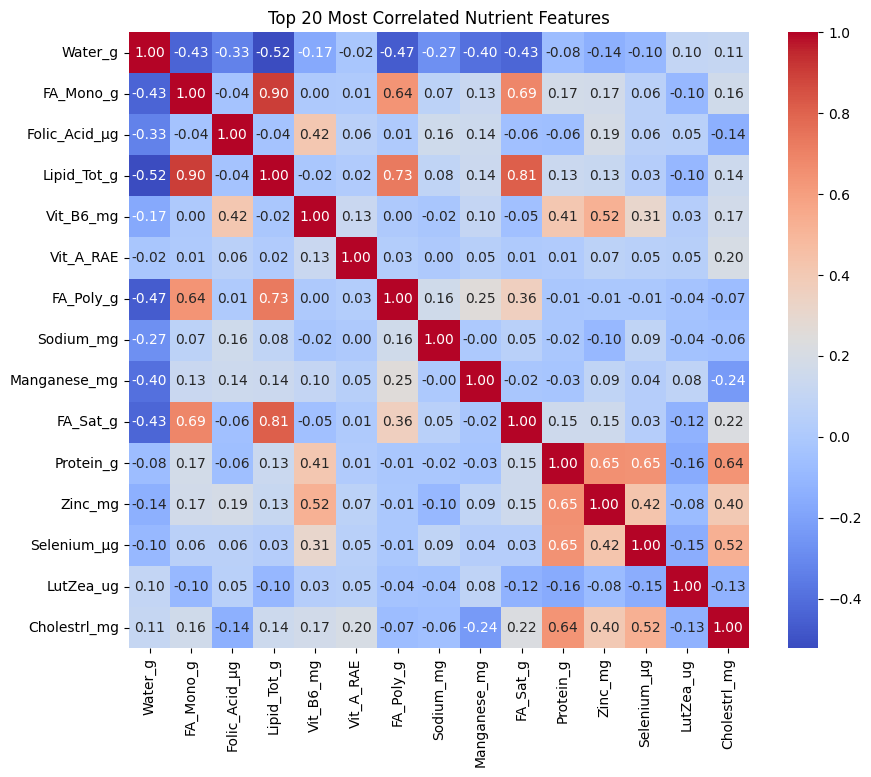

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()

# Unstack to get pairs
corr_pairs = (
    corr_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Filter only the top 20 highest correlations (excluding 1.0 self-correlations)
top_corr = corr_pairs[(corr_pairs < 0.999)].head(20)

# Plot heatmap for those variables
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[top_corr.index.get_level_values(0).unique()]
    .corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Top 20 Most Correlated Nutrient Features")
plt.show()


In [58]:
top_corr

Water_g        Energ_Kcal        0.912110
FA_Mono_g      Lipid_Tot_g       0.902256
Folic_Acid_µg  Folate_DFE_µg     0.855945
Lipid_Tot_g    FA_Sat_g          0.812746
               Energ_Kcal        0.809340
Water_g        Carbohydrt_g      0.780460
Vit_B6_mg      Niacin_mg         0.738601
Vit_A_RAE      Vit_A_IU          0.730740
FA_Poly_g      Lipid_Tot_g       0.729686
FA_Mono_g      Energ_Kcal        0.700652
               FA_Sat_g          0.686243
Sodium_mg      Ash_g             0.669776
Manganese_mg   Magnesium_mg      0.669524
FA_Sat_g       Energ_Kcal        0.668621
Protein_g      Choline_Tot_mg    0.667178
Zinc_mg        Protein_g         0.652876
Selenium_µg    Protein_g         0.648230
FA_Poly_g      FA_Mono_g         0.641532
LutZea_ug      Vit_K_µg          0.638338
Cholestrl_mg   Protein_g         0.638227
dtype: float64

In [59]:
# Drop redundant columns (based on strong correlation)
drop_cols = [
    'FA_Mono_g',     # duplicate info of Lipid_Tot_g
    'Folic_Acid_µg', # redundant with Folate_DFE_µg
    'FA_Sat_g',      # overlaps with Lipid_Tot_g
    'Vit_A_IU'       # redundant with Vit_A_RAE
]

df = df.drop(columns=drop_cols, errors='ignore')

In [60]:
df.to_csv('food_nutrition.csv', index=False)

In [61]:
df.columns

Index(['NDB_No', 'Long_Desc', 'Msre_Desc', 'Gm_Wgt', 'Water_g', 'Energ_Kcal',
       'Protein_g', 'Lipid_Tot_g', 'Ash_g', 'Carbohydrt_g', 'Fiber_TD_g',
       'Sugar_Tot_g', 'Calcium_mg', 'Iron_mg', 'Magnesium_mg', 'Phosphorus_mg',
       'Potassium_mg', 'Sodium_mg', 'Zinc_mg', 'Copper_mg', 'Manganese_mg',
       'Selenium_µg', 'Vit_C_mg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg',
       'Panto_Acid_mg', 'Vit_B6_mg', 'Food_Folate_µg', 'Folate_DFE_µg',
       'Choline_Tot_mg', 'Vit_B12_µg', 'Vit_A_RAE', 'Retinol_µg',
       'Alpha_Carot_µg', 'Beta_Carot_µg', 'Beta_Crypt_µg', 'Lycopene_µg',
       'LutZea_ug', 'Vit_E_mg', 'Vit_D_IU', 'Vit_K_µg', 'FA_Poly_g',
       'Cholestrl_mg', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2',
       'Refuse_Pct'],
      dtype='object')